# Презентационный проект по методу DBSCAN - Кластеризация на основе плотности данных.

**Задача.** 
Разделить данные на N кластеров, в зависимости от количества потребляемого товара.

* FRESH: расходы за год на свежие продукты (непрерывная переменная);
* MILK: расходы за год на молочные продукты (непрерывная переменная);
* GROCERY: расходы за год на продовольственные товары / бакалея (непрерывная переменная);
* FROZEN: расходы за год на замороженные продукты (непрерывная переменная)
* DETERGENTS_PAPER: расходы за год на моющие средства и бумажные изделия (непрерывная переменная)
* DELICATESSEN: расходы за год на деликатесы (непрерывная переменная);
* CHANNEL: канал клиента - индустрия общественного питания Horeca (отели/рестораны/кафе) или розничный канал Retail (Категориальная переменная)
* REGION: регион клиента - Lisnon, Oporto или Other (Категориальная переменная)

**Импорт библиотек.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Импорт DataFrame.**

In [2]:
df = pd.read_csv('Dbscan_Project_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**Анализ каналов.**

Наблюдаем, что расходы для канала 1 заметно меньше чем для канала 2.

<Axes: xlabel='Milk', ylabel='Grocery'>

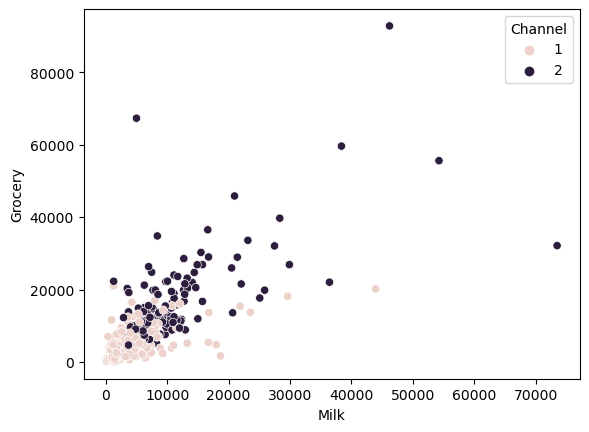

In [4]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

**Кластерная карта.**

Смотрим корреляции между отдельными категориями.

Анализируем признаки только с непрерывными значениями.

Correlation Between Spending Categories


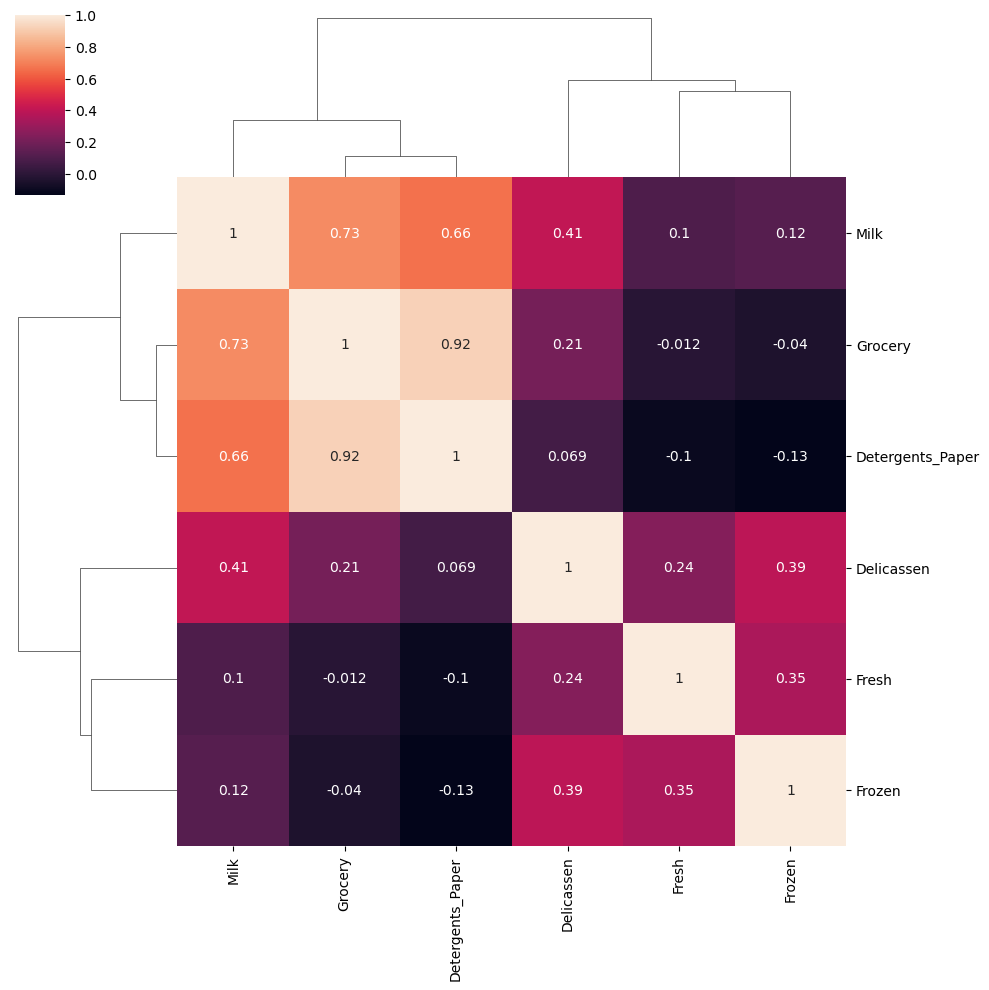

In [5]:
print('Correlation Between Spending Categories')
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True);

C:\Users\AdminPC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


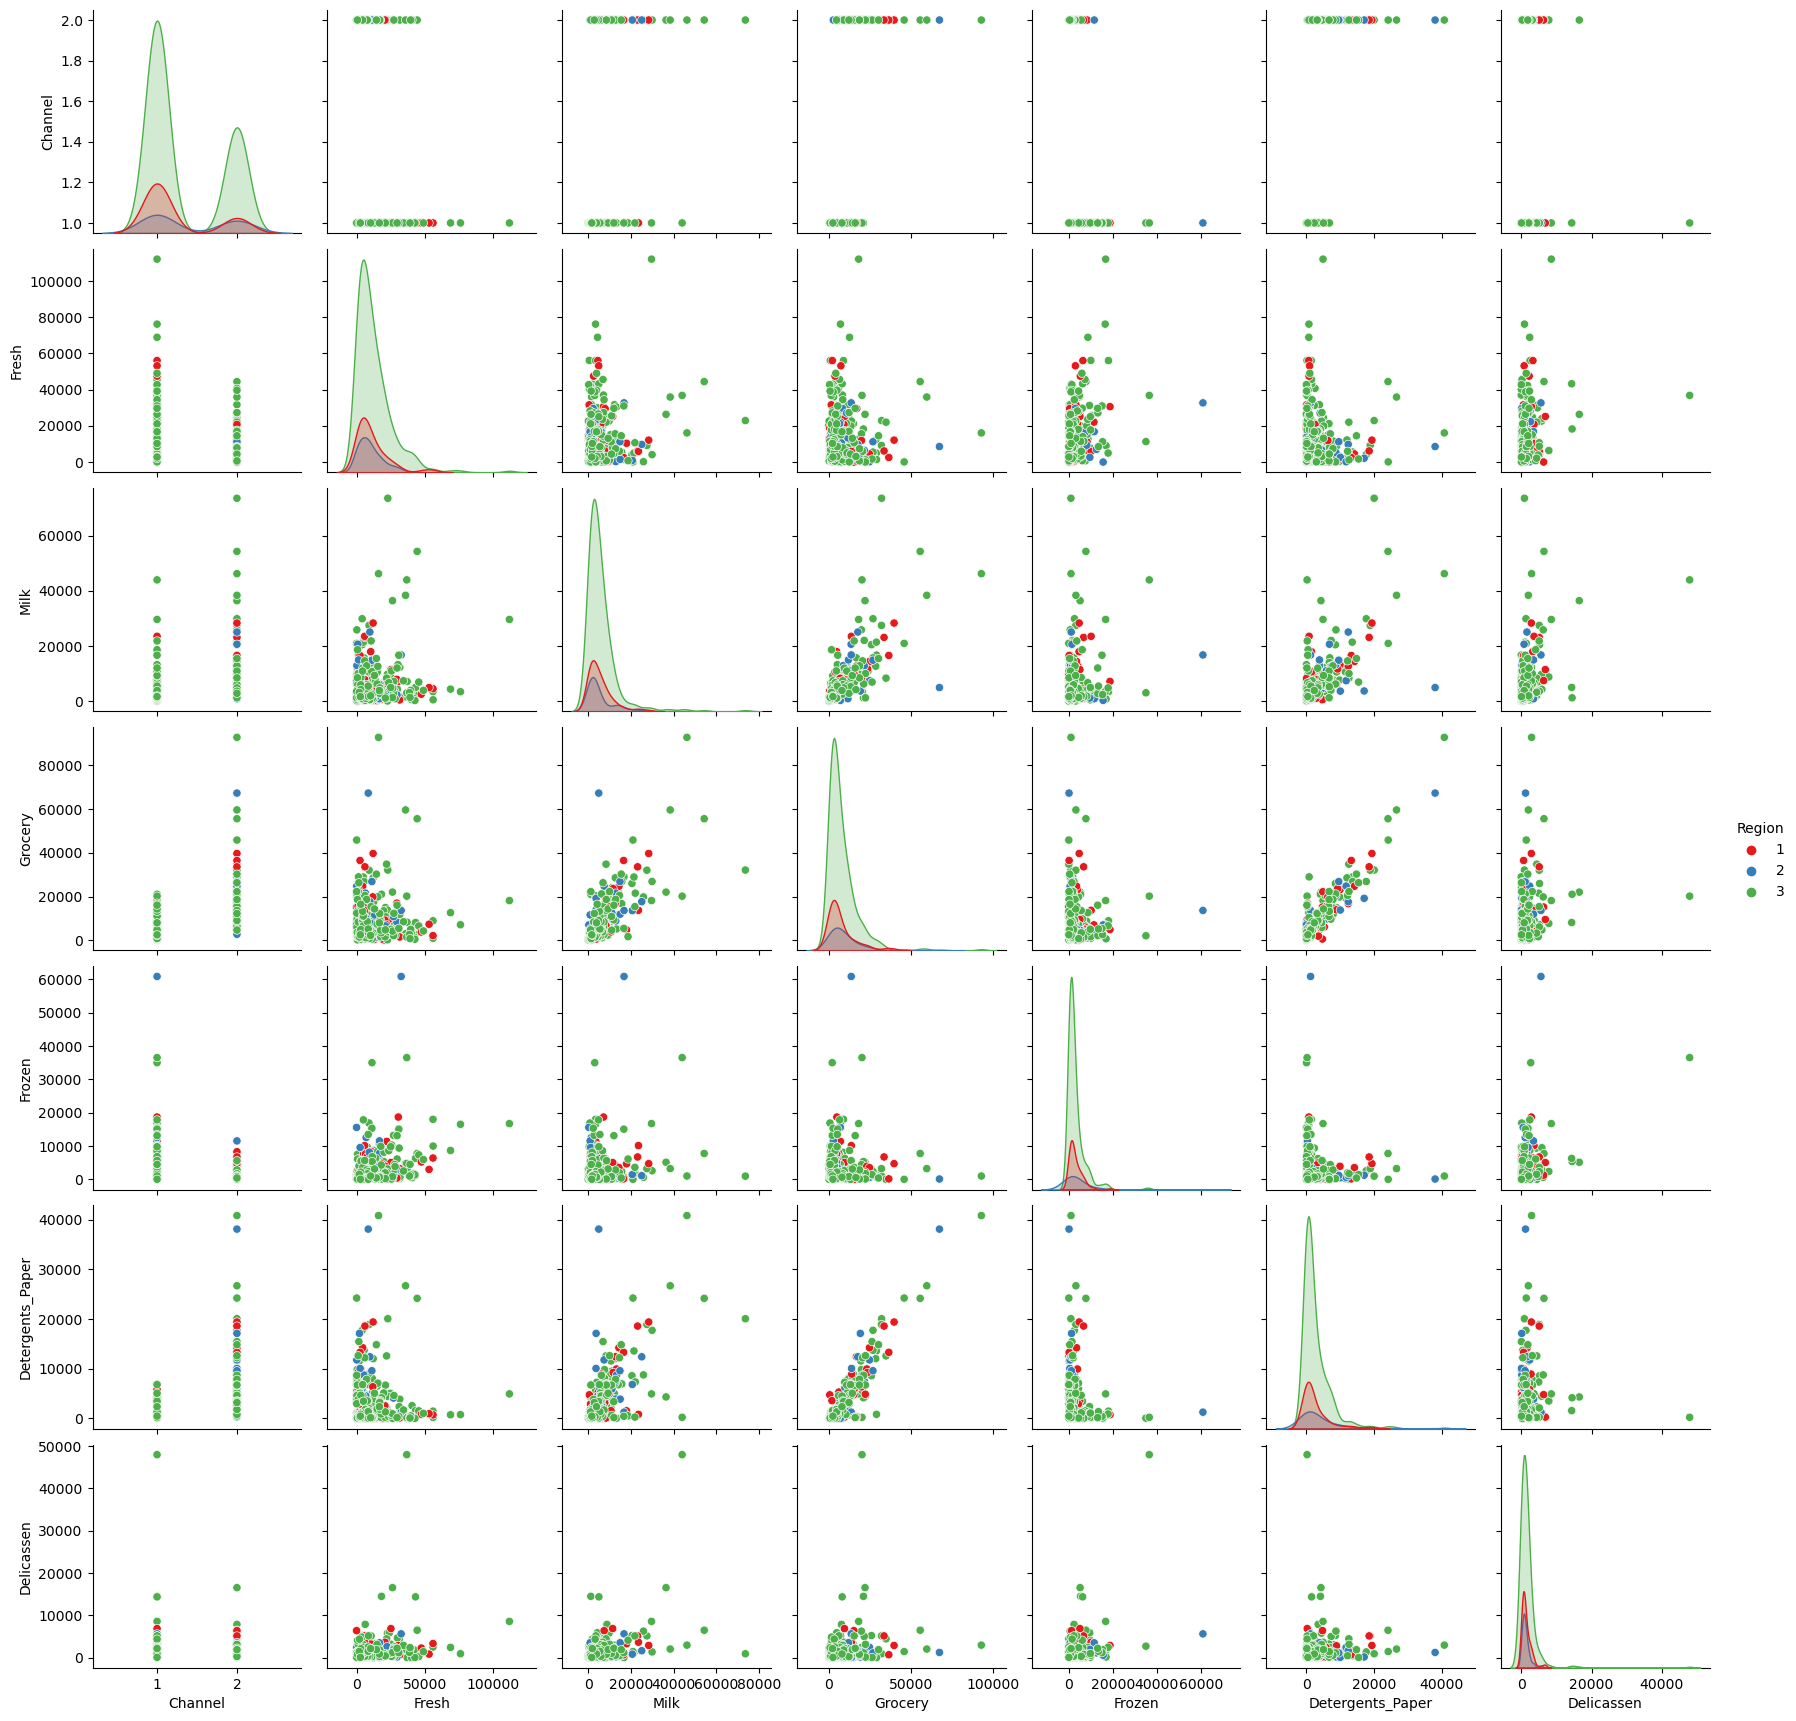

In [6]:
sns.pairplot(df,hue='Region',palette='Set1')

C:\Users\AdminPC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


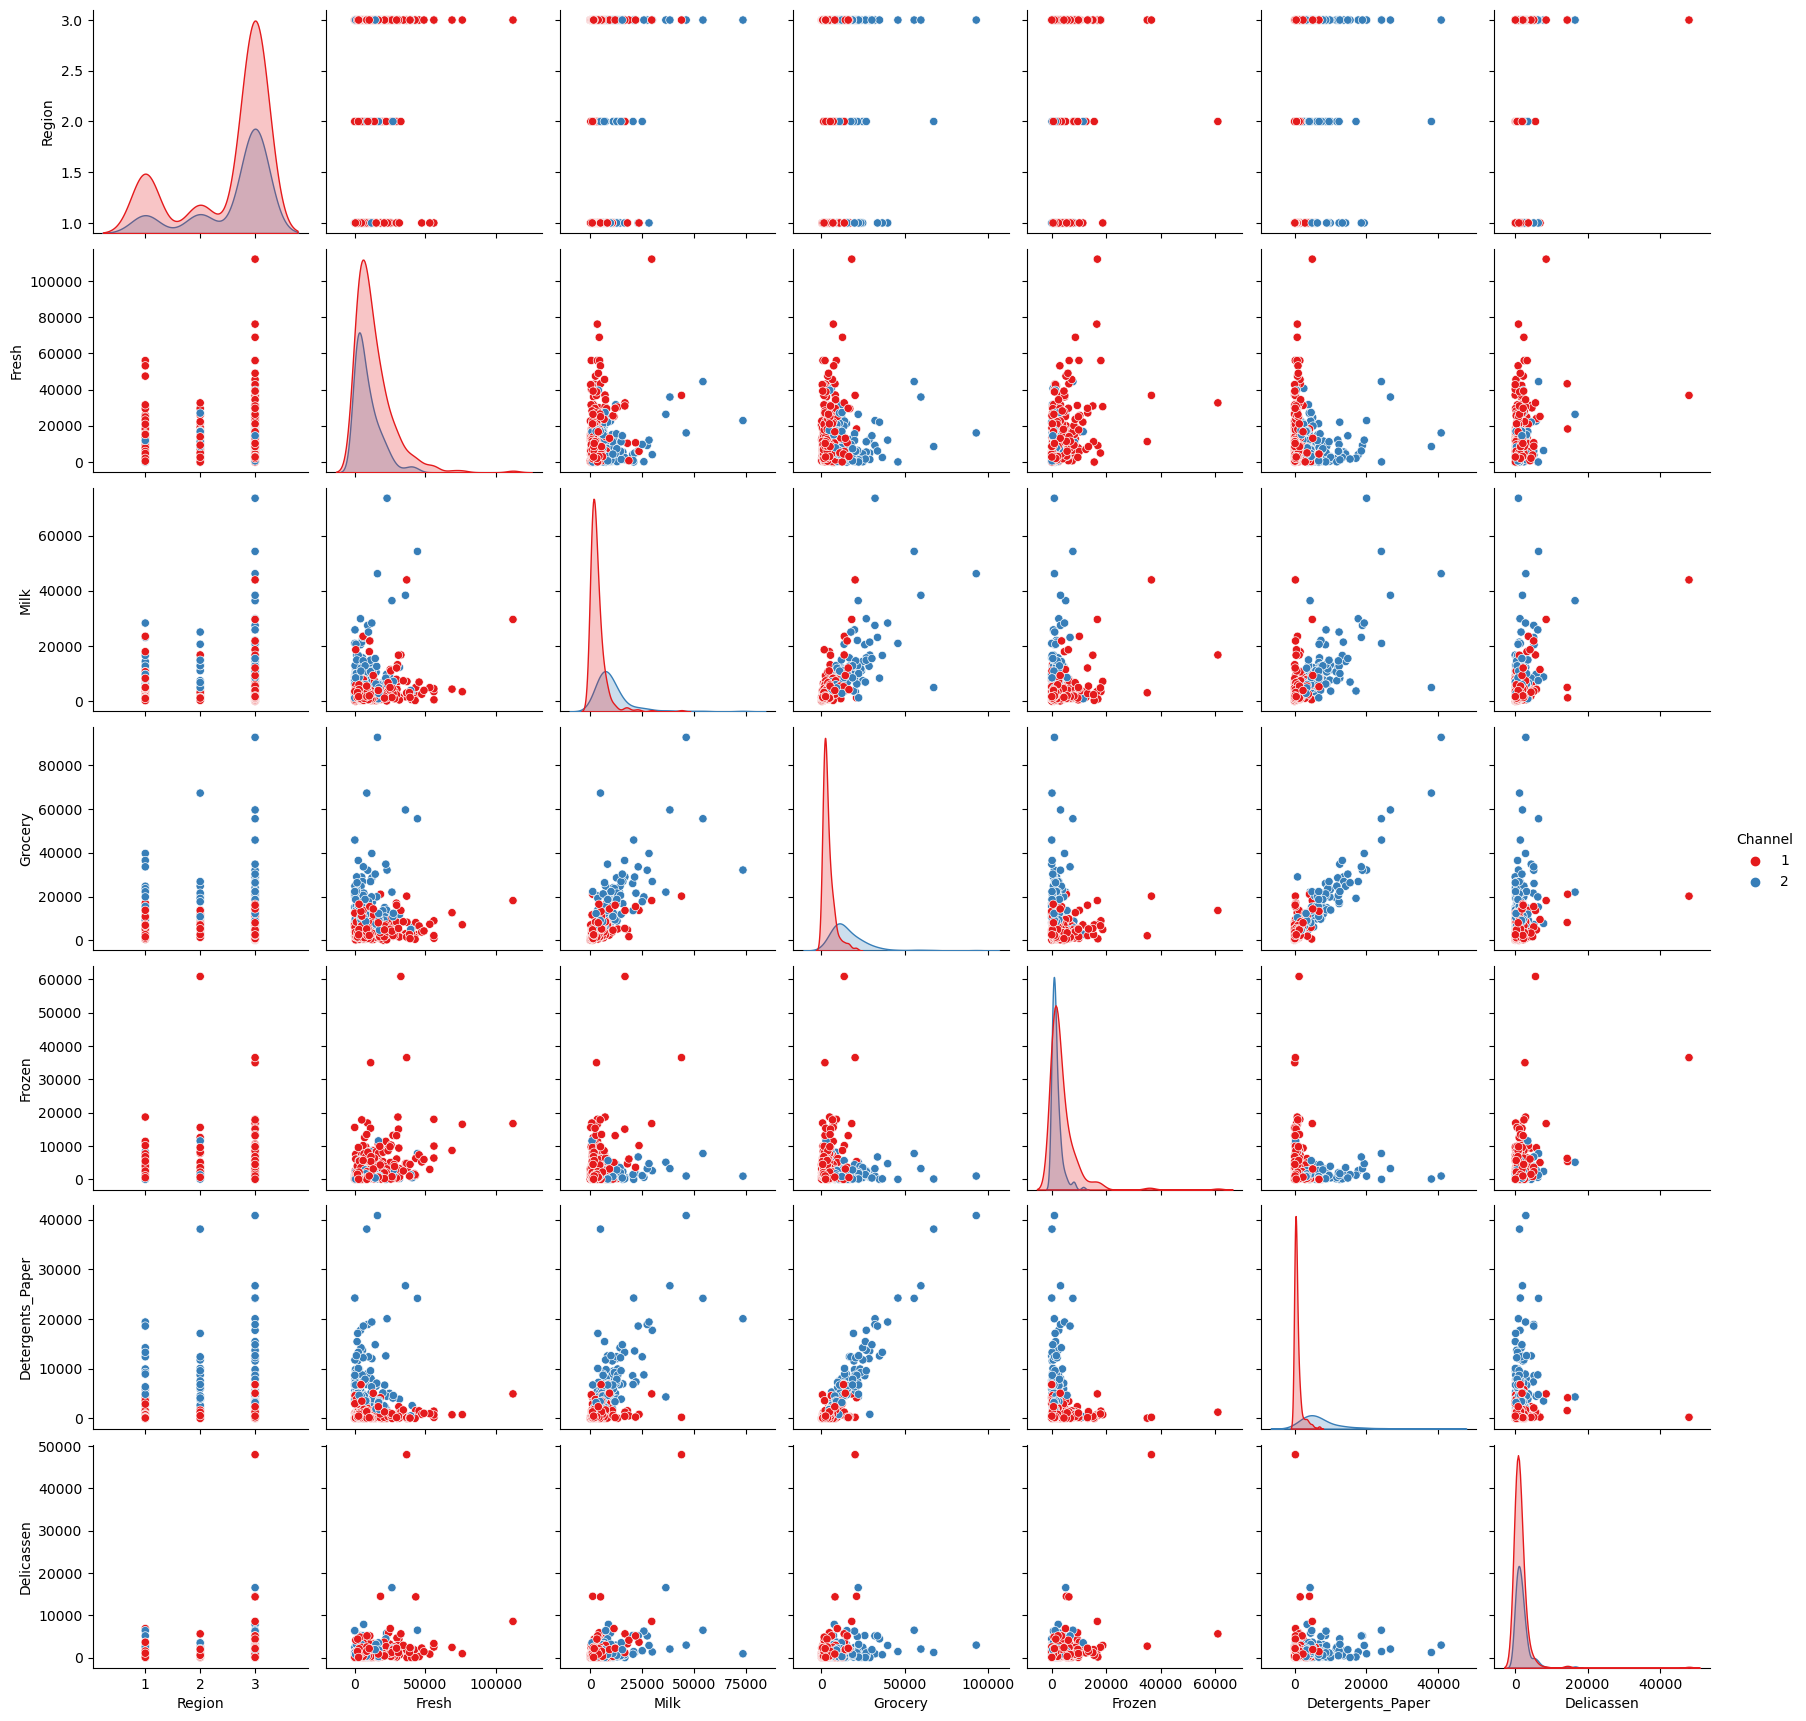

In [7]:
sns.pairplot(df,hue='Channel',palette='Set1')

**Масштабируем признаки.**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [9]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**Подбираем оптимальное значение гиперпараметра eps (эпсилон).**

Также собираем процент выбросов при том или ином эпсилон.

Выбираем такое значение эпсилон при котором выбросы меняются не слишком сильно. 

В нашем случае eps == 2.0

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

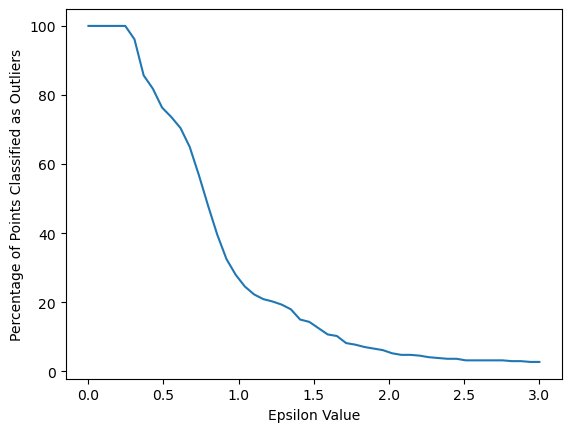

In [12]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

**Обучаем модель с лучшим значением гиперпараметра.**

In [13]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

**Наблюдения входящие в кластера.**

Выбросы входят в кластер -1.

<Axes: xlabel='Grocery', ylabel='Milk'>

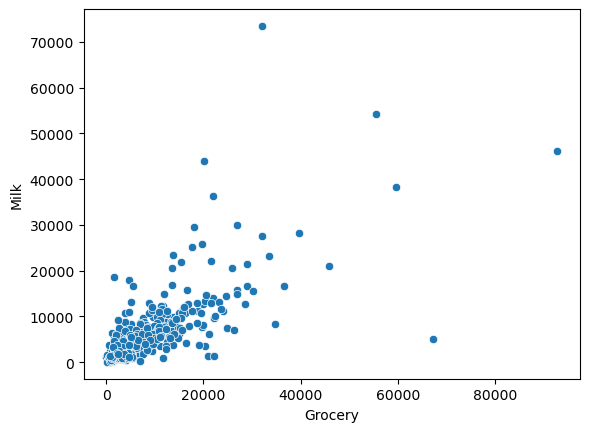

In [14]:
sns.scatterplot(data=df,x='Grocery',y='Milk')#,hue=dbscan.labels_)

**Создаём доп. колонку.**

Чтобы в дальнейшем работать не с графиками, а с числами.

In [15]:
df['Labels'] = dbscan.labels_

In [16]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**Смотрим как средние значений признаков, отличаются для разных кластеров.**



In [17]:
cats = df.drop(['Channel','Region'],axis=1)
cat_means = cats.groupby('Labels').mean()

In [18]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)
scaled_means = pd.DataFrame(data,cat_means.index,cat_means.columns)

**Видим, что наблюдения входящие в кластер -1 тратят больше всех.**

Также, наблюдения входящие в кластер 1, тратят меньше всех.

Наблюдаем подтверждение на тепловой карте.

Также, наблюдаем разницу в потреблении товаров в кластерах 1, 0 по различным признакам.

In [21]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<Axes: ylabel='Labels'>

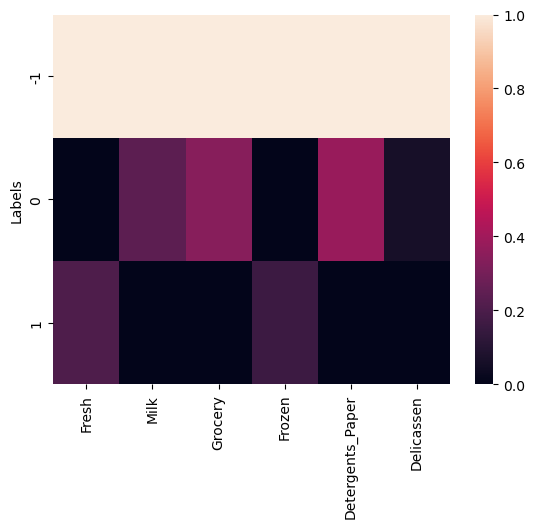

In [22]:
sns.heatmap(scaled_means)

<Axes: ylabel='Labels'>

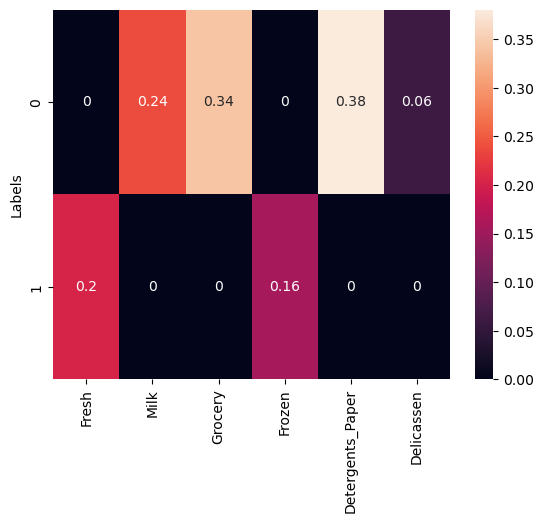

In [23]:
sns.heatmap(scaled_means.loc[[0,1]],annot=True)